In [1]:
import pandas as pd
import openpyxl
import states
import scipy.stats as st
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# !pip install openpyxl

## Get and clean up data

In [15]:
# read in files
gdp = pd.read_csv("gdp_by_state.csv")
legislators = pd.read_csv("legislators-current.csv")
states_df = pd.Series(states.us_state_to_abbrev).reset_index()

In [16]:
# rename gdp fields when needed, review quarters --> states are names
gdp.rename(columns={'Unnamed: 1': 'Currency'}, inplace=True)  # probably don't need this
# remove 
gdp.drop(columns="GeoFips", inplace=True)
gdp.set_index("GeoName", inplace=True)
gdp

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GeoName,,,,,,,,,,,,,,,,,,,,,
Alabama,104811.9,110212.0,115680.1,119851.7,122915.5,127505.0,134152.6,147715.2,158846.8,166469.0,...,183916.6,189245.5,194786.9,197406.9,202372.4,207368.4,215085.9,224046.9,231171.8,226896.5
Alaska,25810.8,24227.5,24744.3,26806.6,28494.1,29756.8,32037.9,35302.4,40356.6,45094.1,...,56896.3,58283.6,57247.7,56484.9,51490.9,50727.7,53089.3,54711.7,54547.1,49820.0
Arizona,132281.0,143302.6,155755.8,165110.7,171909.6,180522.3,193634.9,206541.1,227915.9,245957.0,...,260915.7,271440.0,278591.6,287666.6,299393.3,313081.4,330416.1,349907.5,369988.2,373719.0
Arkansas,59846.3,62396.7,66811.3,68678.5,70616.7,74113.9,78695.1,85199.6,90887.7,95875.1,...,105768.1,108492.1,113227.3,116139.4,117786.8,119152.4,122350.2,127306.5,130839.9,130750.7
California,1071117.0,1147520.4,1241899.7,1356975.4,1375761.3,1418429.6,1497918.7,1588177.4,1698560.4,1812210.0,...,2023500.0,2113096.4,2220389.9,2335286.5,2473555.9,2569634.0,2730973.9,2895101.0,3052645.2,3007187.7
Colorado,136898.7,150330.0,163763.3,180063.2,186695.8,190019.0,196126.5,204167.2,220783.7,232646.7,...,267516.1,276823.1,292140.5,309542.6,320721.1,329911.7,348898.1,371424.6,392218.0,382584.7
Connecticut,138331.8,145475.5,152287.5,165614.3,171216.6,173248.3,178702.2,195354.9,205214.6,219768.4,...,233158.7,240911.9,241517.4,246597.0,259487.8,263670.3,271582.6,280692.0,288109.1,276422.9
Delaware,33353.4,37106.0,40345.1,43451.3,46096.1,45508.3,47686.1,51353.7,52153.5,55174.4,...,61372.2,62354.6,61716.2,68354.7,71913.9,69355.0,68763.8,72488.0,77042.2,75786.5
District of Columbia,52503.6,54815.3,58819.2,61092.9,65442.9,69919.5,73957.1,80140.1,84867.6,88125.0,...,109730.4,112157.0,114540.1,119414.6,124604.7,129648.6,133391.2,139784.8,144405.7,144554.8


In [9]:
# transpose for ease
gdpt = gdp.transpose()
gdpt = gdpt[1:]
gdpt

GeoName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1998,110212.0,24227.5,143302.6,62396.7,1147520.4,150330.0,145475.5,37106.0,54815.3,429138.4,...,20228.1,167394.6,645142.6,62296.1,16080.7,231384.0,209741.1,40014.6,162609.3,14840.2
1999,115680.1,24744.3,155755.8,66811.3,1241899.7,163763.3,152287.5,40345.1,58819.2,458058.9,...,21078.7,176281.9,679870.3,66019.3,17176.9,249801.1,229797.9,41714.3,172224.1,15679.7
2000,119851.7,26806.6,165110.7,68678.5,1356975.4,180063.2,165614.3,43451.3,61092.9,490429.8,...,22743.3,182247.2,738677.0,70295.9,18341.1,268470.9,237378.2,42495.6,180427.3,17152.5
2001,122915.5,28494.1,171909.6,70616.7,1375761.3,186695.8,171216.6,46096.1,65442.9,519058.6,...,23412.1,186441.3,773375.5,73057.6,19323.2,285635.9,238418.6,43973.3,188163.1,18708.3
2002,127505.0,29756.8,180522.3,74113.9,1418429.6,190019.0,173248.3,45508.3,69919.5,553010.3,...,26322.1,195764.3,789817.6,75796.9,20273.0,295355.7,245978.5,45580.8,194658.8,19165.6
2003,134152.6,32037.9,193634.9,78695.1,1497918.7,196126.5,178702.2,47686.1,73957.1,590483.1,...,27216.1,205126.4,833342.3,78945.4,21293.2,311665.7,255370.2,47039.9,203339.2,21193.6
2004,147715.2,35302.4,206541.1,85199.6,1588177.4,204167.2,195354.9,51353.7,80140.1,646630.6,...,29271.3,219327.9,913444.4,86081.9,22938.2,332115.1,268378.3,49741.4,215537.1,23429.4
2005,158846.8,40356.6,227915.9,90887.7,1698560.4,220783.7,205214.6,52153.5,84867.6,705851.9,...,30997.4,231633.5,995252.4,95355.1,23608.6,358069.7,293676.0,53492.5,227297.0,27576.3
2006,166469.0,45094.1,245957.0,95875.1,1812210.0,232646.7,219768.4,55174.4,88125.0,750523.8,...,32364.5,243583.9,1103197.6,106537.3,24331.5,376235.7,314265.2,57010.0,237569.3,32740.3
2007,172975.2,49583.7,261392.0,98381.6,1898902.0,248446.5,234540.7,56612.8,93785.4,782712.5,...,35073.0,248692.4,1191093.1,114813.4,24797.7,391699.8,342024.2,59273.5,245839.5,36950.8


In [10]:
state_gdp = gdpt.sum().reset_index()
state_gdp

,GeoName,0
0,Alabama,3971327.3
1,Alaska,1038115.1
2,Arizona,5847664.6
3,Arkansas,2282171.0
4,California,46246679.3
5,Colorado,6033222.0
6,Connecticut,5150500.2
7,Delaware,1336107.4
8,District of Columbia,2309286.3
9,Florida,17513592.1


In [13]:
# look at legislators --> states are abbreviations
legislators

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,opensecrets_id,lis_id,fec_ids,cspan_id,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,N00003535,S307,"H2OH13033,S6OH00163",5051.0,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,N00007836,S275,"S8WA00194,H2WA01054",26137.0,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,N00001955,S308,"H6MD03177,S6MD03177",4004.0,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,N00012508,S277,S8DE00079,663.0,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,N00027503,S309,S6PA00217,47036.0,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Stansbury,Melanie,Ann,NaN,NaN,Melanie A. Stansbury,1979-01-31,F,rep,NM,...,N00047871,NaN,H2NM01144,NaN,456861,NaN,Melanie Ann Stansbury,NaN,NaN,Melanie Stansbury
536,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,NaN,NaN,H8TX06266,NaN,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey
537,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,NaN,NaN,H2OH11169,NaN,456863,NaN,NaN,NaN,NaN,Shontel Brown
538,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,NaN,NaN,H2OH15228,NaN,456864,NaN,NaN,NaN,NaN,Mike Carey (politician)


In [18]:
# get designated states dataframe to convert abbreviations to names
states_df.columns = ['StateName', 'StateAbbrev']
states_df

,StateName,StateAbbrev
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [19]:
gdp_summary = state_gdp.merge(states_df, how="inner", left_on="GeoName", right_on="StateName")
gdp_summary

# validated_states = gdp_summary.StateName.values
# len(validated_states)

,GeoName,0,StateName,StateAbbrev
0,Alabama,3971327.3,Alabama,AL
1,Alaska,1038115.1,Alaska,AK
2,Arizona,5847664.6,Arizona,AZ
3,Arkansas,2282171.0,Arkansas,AR
4,California,46246679.3,California,CA
5,Colorado,6033222.0,Colorado,CO
6,Connecticut,5150500.2,Connecticut,CT
7,Delaware,1336107.4,Delaware,DE
8,District of Columbia,2309286.3,District of Columbia,DC
9,Florida,17513592.1,Florida,FL


In [25]:
joined_leg = legislators.merge(gdp_summary, how="left", left_on="state", right_on="StateAbbrev")

#expect 540 rows returned
len(joined_leg)

540

In [26]:
joined_leg

,last_name,first_name,middle_name,suffix,nickname,full_name,birthday,gender,type,state,...,govtrack_id,votesmart_id,ballotpedia_id,washington_post_id,icpsr_id,wikipedia_id,GeoName,0,StateName,StateAbbrev
0,Brown,Sherrod,NaN,NaN,NaN,Sherrod Brown,1952-11-09,M,sen,OH,...,400050,27018.0,Sherrod Brown,NaN,29389.0,Sherrod Brown,Ohio,11887340.3,Ohio,OH
1,Cantwell,Maria,NaN,NaN,NaN,Maria Cantwell,1958-10-13,F,sen,WA,...,300018,27122.0,Maria Cantwell,NaN,39310.0,Maria Cantwell,Washington,8586927.0,Washington,WA
2,Cardin,Benjamin,L.,NaN,NaN,Benjamin L. Cardin,1943-10-05,M,sen,MD,...,400064,26888.0,Ben Cardin,NaN,15408.0,Ben Cardin,Maryland,6922004.2,Maryland,MD
3,Carper,Thomas,Richard,NaN,NaN,Thomas R. Carper,1947-01-23,M,sen,DE,...,300019,22421.0,Tom Carper,NaN,15015.0,Tom Carper,Delaware,1336107.4,Delaware,DE
4,Casey,Robert,P.,Jr.,Bob,"Robert P. Casey, Jr.",1960-04-13,M,sen,PA,...,412246,2541.0,"Bob Casey, Jr.",NaN,40703.0,Bob Casey Jr.,Pennsylvania,13538654.6,Pennsylvania,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Stansbury,Melanie,Ann,NaN,NaN,Melanie A. Stansbury,1979-01-31,F,rep,NM,...,456861,NaN,Melanie Ann Stansbury,NaN,NaN,Melanie Stansbury,New Mexico,1815067.9,New Mexico,NM
536,Ellzey,Jake,NaN,NaN,NaN,Jake Ellzey,1970-01-24,M,rep,TX,...,456862,NaN,Jake Ellzey,NaN,NaN,Jake Ellzey,Texas,28458956.6,Texas,TX
537,Brown,Shontel,M.,NaN,NaN,Shontel M. Brown,1975-06-24,F,rep,OH,...,456863,NaN,NaN,NaN,NaN,Shontel Brown,Ohio,11887340.3,Ohio,OH
538,Carey,Mike,NaN,NaN,NaN,Mike Carey,1971-03-13,M,rep,OH,...,456864,NaN,NaN,NaN,NaN,Mike Carey (politician),Ohio,11887340.3,Ohio,OH


## EDA

### GDP

<AxesSubplot:>

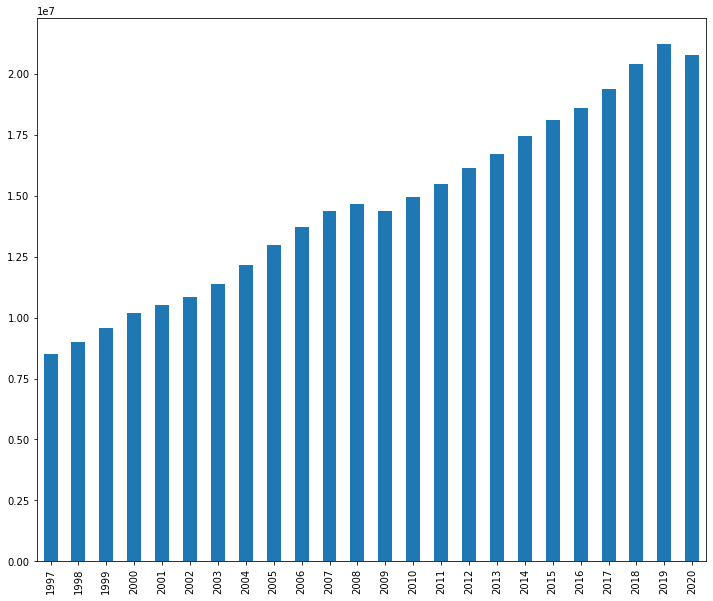

In [7]:
gdp.T.sum(axis=1).plot(kind="bar", figsize=(12,10))

<AxesSubplot:xlabel='GeoName'>

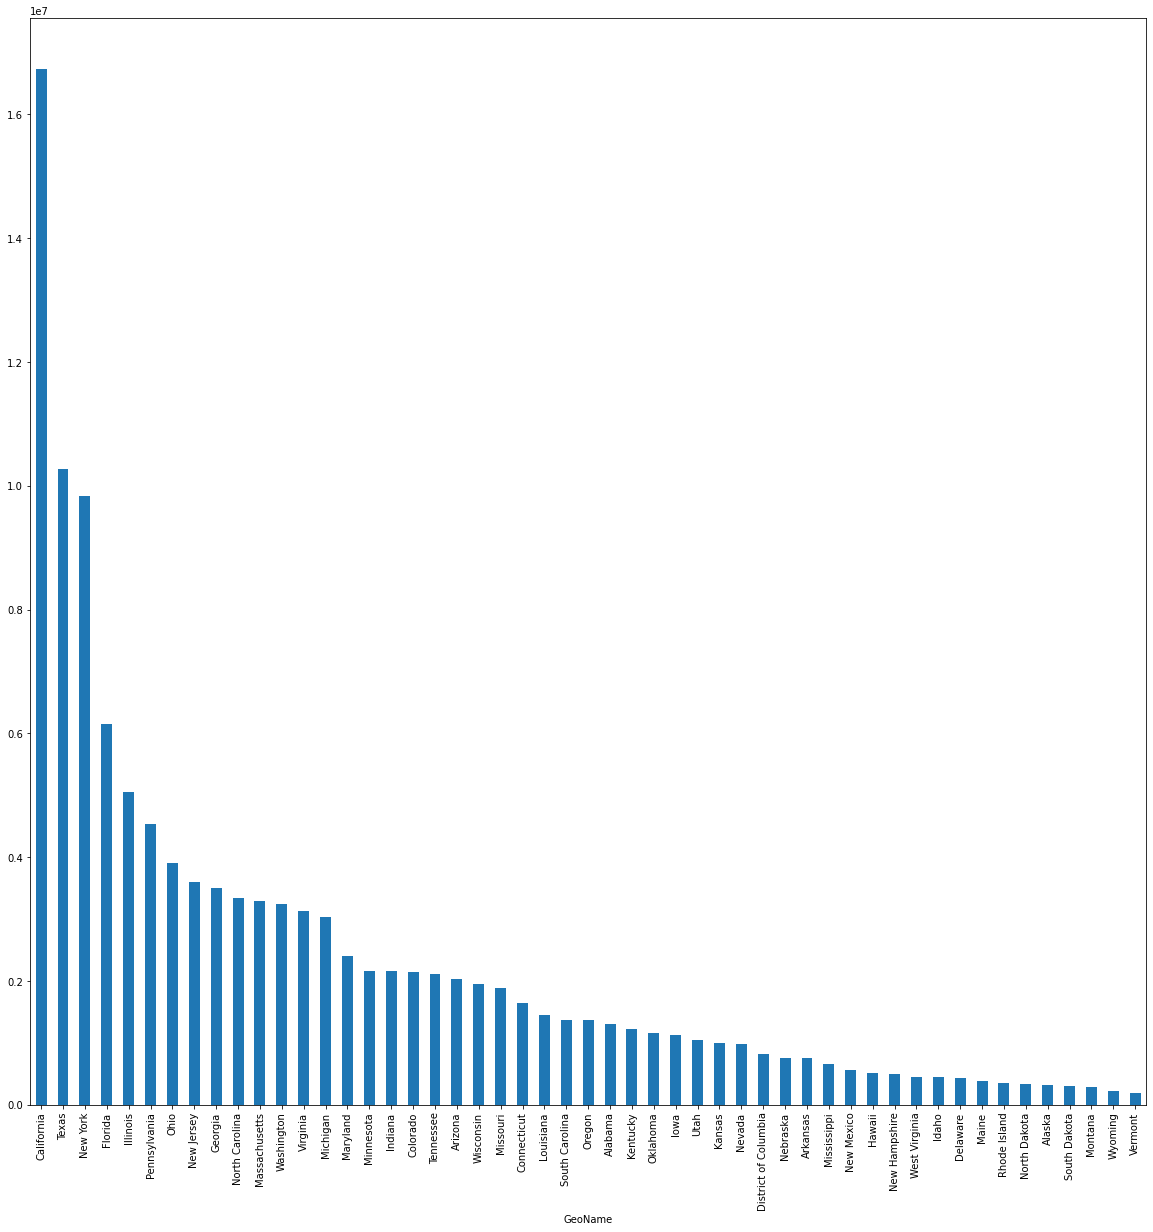

In [49]:
# state_gdp
gdp.loc[:, '2015':].sum(axis=1).sort_values(ascending=False).plot(kind="bar", figsize=(20,20))

In [70]:
# setting total GDP sum
tot_gdp = gdp.loc[:, '2015':].sum().sum()

# create proportion table to calculate expected representatives
gdp_prop = gdp.loc[:, '2015':].sum(axis=1) / tot_gdp

#### Determine total contribution to GDP

In [83]:
# convert series to dataframe, give it a name
gdp_prop = pd.DataFrame(gdp_prop, columns=['PercGDPCont'])
# view by sort for ease
gdp_prop.sort_values(by=['PercGDPCont'], ascending=False)

,PercGDPCont
GeoName,
California,0.141227
Texas,0.086774
New York,0.083072
Florida,0.051874
Illinois,0.042636
Pennsylvania,0.038242
Ohio,0.033040
New Jersey,0.030363
Georgia,0.029595


<AxesSubplot:xlabel='GeoName'>

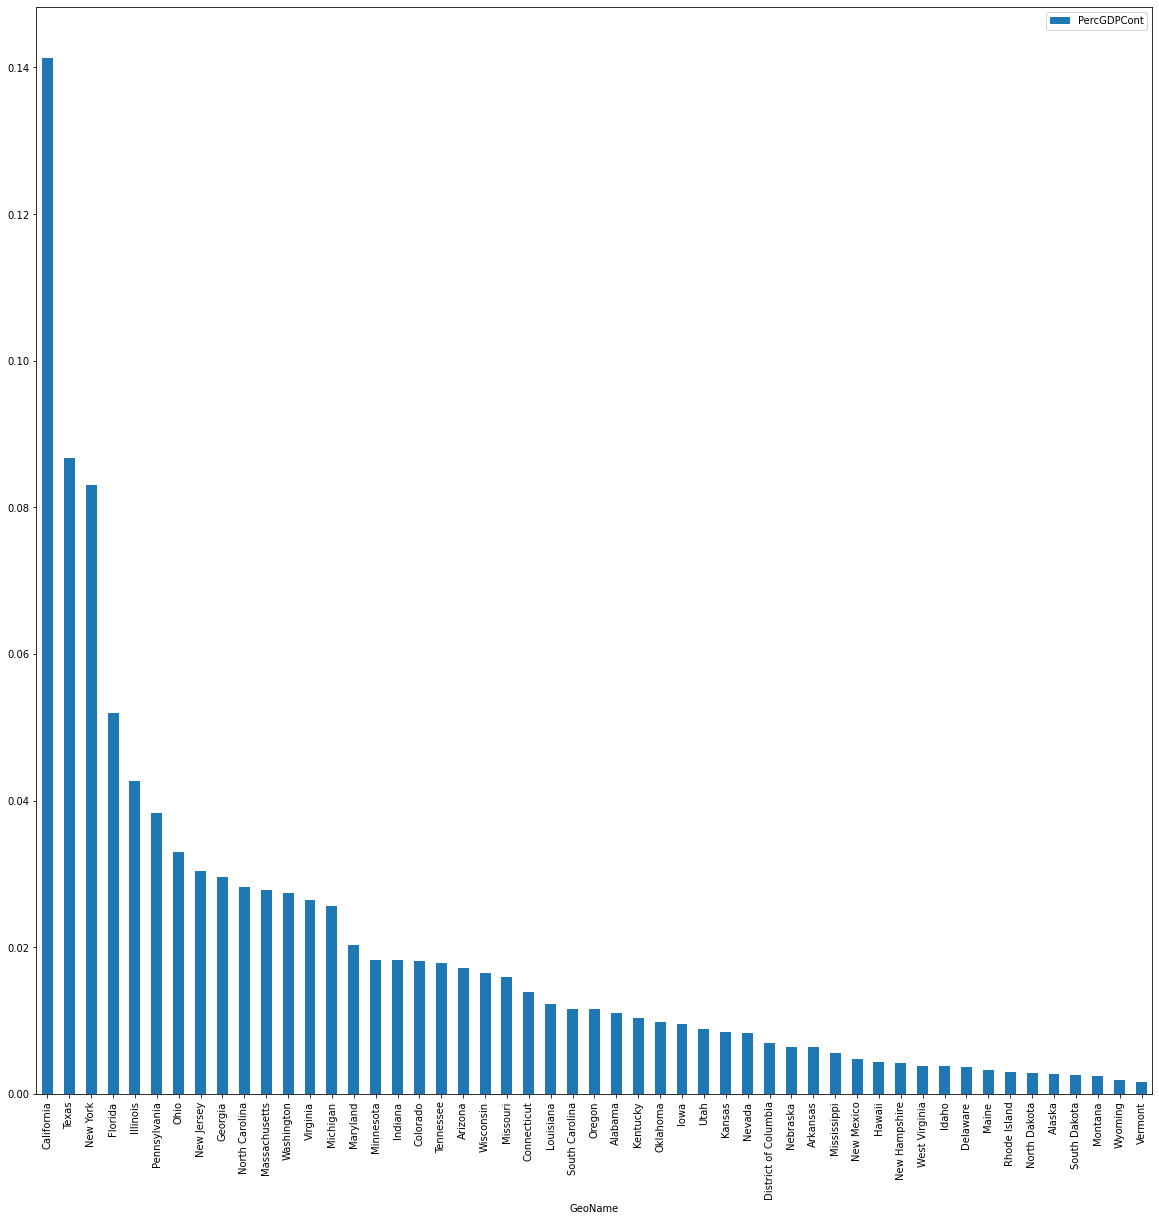

In [81]:
gdp_prop.sort_values(ascending=False, by=['PercGDPCont']).plot(kind="bar", figsize=(20,20))

#### Gather all values for calculations

In [116]:
# get all representatives in congress
total_cong = len(legislators[legislators['type'] == 'rep'])

# calculate expected rep congress
expected_cong = gdp_prop * total_cong
expected_cong.columns = ['expCong']

# get actual rep in congress size
act_cong = pd.Series(joined_leg.groupby('StateName').size(), name='act_cong')

# get actual republican congress people
reps = pd.Series(joined_leg[joined_leg.party == "Republican"].groupby('StateName').size(), name='act_rs')

In [133]:
# create comparison table for plots
comp_tab = pd.concat([expected_cong, act_cong], axis=1)
# join with actual republicans
comp_tab = pd.concat([comp_tab, reps], axis=1)
# determine representation. positive number means over-representation by GDP
comp_tab['diff'] = comp_tab['act_cong'] - comp_tab['expCong']
# get percent republican to see if difference between higher and lower perc_r states
comp_tab['perc_r'] = comp_tab['act_rs'] / comp_tab['act_cong']
# view by difference
comp_tab.sort_values(by=['diff'], ascending=True)

,expCong,act_cong,act_rs,diff,perc_r
California,62.139692,54,10.0,-8.139692,0.185185
New York,36.551676,29,8.0,-7.551676,0.275862
District of Columbia,3.032453,1,NaN,-2.032453,NaN
Massachusetts,12.204344,11,NaN,-1.204344,NaN
Texas,38.180538,38,25.0,-0.180538,0.657895
Washington,12.036792,12,3.0,-0.036792,0.250000
New Jersey,13.359581,14,2.0,0.640419,0.142857
Connecticut,6.091596,7,NaN,0.908404,NaN
Colorado,7.970349,9,3.0,1.029651,0.333333
Maryland,8.919371,10,1.0,1.080629,0.100000


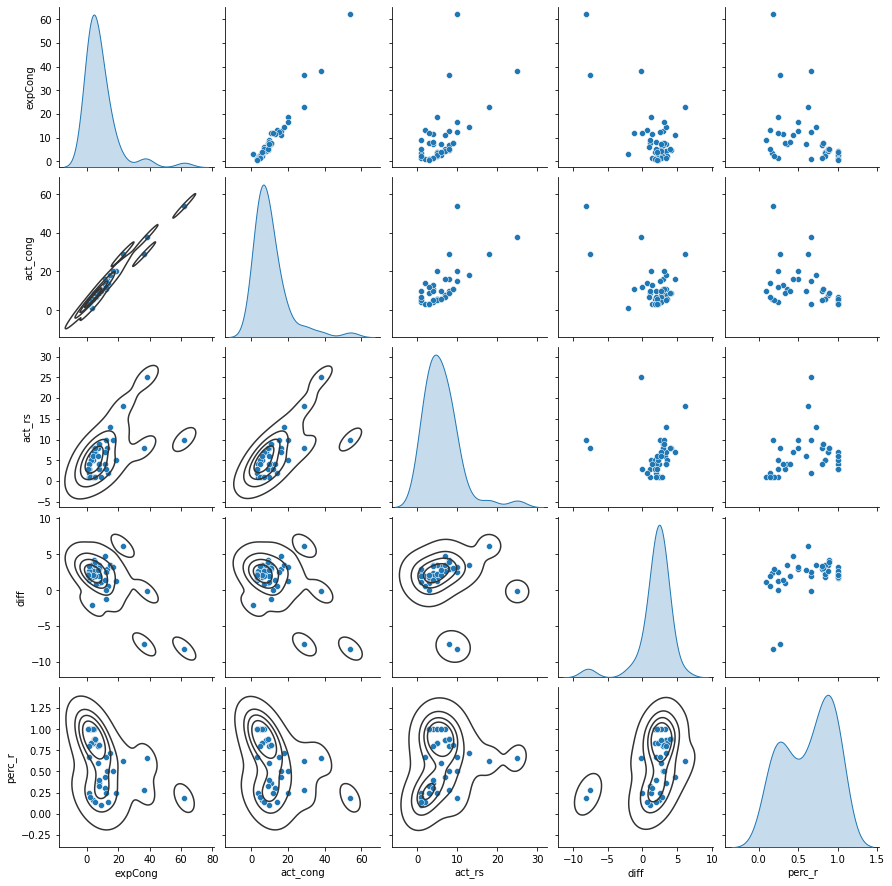

In [134]:
# try plotting
g = sns.pairplot(comp_tab, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=5, color=".2")

<AxesSubplot:xlabel='act_rs', ylabel='diff'>

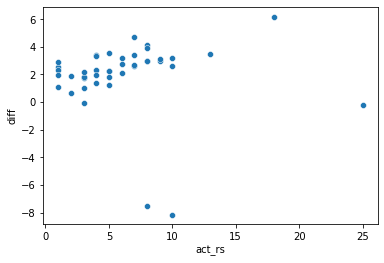

In [126]:
sns.scatterplot(x=comp_tab['act_rs'], y=comp_tab['diff'])

### Legislators

In [84]:
legislators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   last_name           540 non-null    object 
 1   first_name          540 non-null    object 
 2   middle_name         247 non-null    object 
 3   suffix              18 non-null     object 
 4   nickname            42 non-null     object 
 5   full_name           540 non-null    object 
 6   birthday            540 non-null    object 
 7   gender              540 non-null    object 
 8   type                540 non-null    object 
 9   state               540 non-null    object 
 10  district            440 non-null    float64
 11  senate_class        100 non-null    float64
 12  party               540 non-null    object 
 13  url                 537 non-null    object 
 14  address             540 non-null    object 
 15  phone               540 non-null    object 
 16  contact_

<AxesSubplot:xlabel='state'>

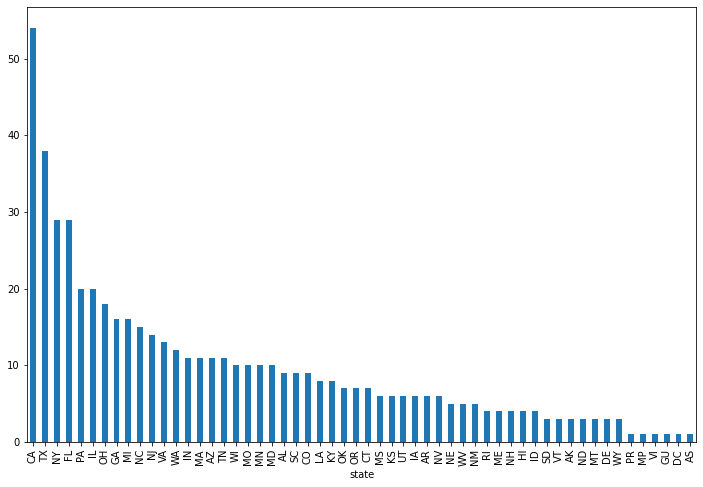

In [24]:
legislators.groupby('state').size().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

<AxesSubplot:xlabel='gender', ylabel='count'>

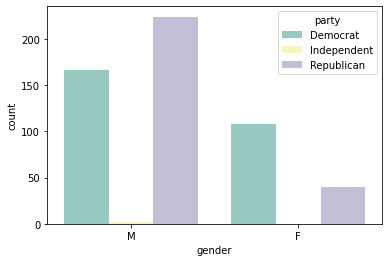

In [85]:
# fig, axes = plt.subplots(1, 2, figsize=(16, 4))
# plt.figure(figsize=(10,8))
sns.countplot(x='gender', palette="Set3", hue='party', data=joined_leg)

<AxesSubplot:xlabel='type', ylabel='count'>

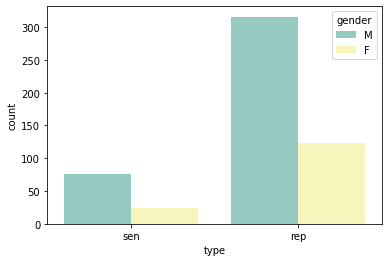

In [86]:
sns.countplot(x='type', palette="Set3", hue='gender', data=joined_leg)

In [ ]:
x,y = 'type', 'gender'

df1 = joined_leg.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar', palette="Set3", data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)